# EXERCISE 9
Nama: Michelle Chandra <br> 
NIM: 0706022010019 <br>
Data Mining Week 9

# Association Rule Mining

Data mining merupakan sebuah proses yang menggunakan beragam alat data analisis untuk menemukan adanya pola-pola dan hubungan didalam data yang akan digunakan dalam menghasilkan prediksi yang tepat. Dengan data mining, dapat menemukan informasi yang tersembunyi dan menemukan pola yang menarik didalam database (Solanki & Patel, 2015; Yuan, 2017).

Dalam machine learning ada tiga kategori utama, yaitu supervised learning, unsupervised learning dan reinforcement learning. Salah satu kategori yang akan dibahas adalah unsupervised learning. Unsupervised learning bekerja dengan cara sebuah model yang di *trained* pada data yang tidak ada labelnya serta dari mengekstrak atribut dan pola yang kemudian akan menghasilkan model yang akan belajar dari data tersebut. Dapat dikatakan juga bahwa tidak ada label yang digunakan pada *learning algorithm* (Dridi, 2021). Unsupervised learning terdiri dari empat tipe, clustering, association, anomaly detection dan autoencoders. 

Association rule merupakan salah satu yang algoritmanya belajar sendiri tanpa ada data yang diberi label. Association rule sendiri bukan metode prediktif, melainkan deskriptif, karena digunakan untuk menemukan relasi-relasi yang tersembunyi dalam jumlah data yang besar. Association rule mining menunjukkan data analisis yang penting dan teknik *mining* yang berguna dalam *multiple machine learning task* untuk menemukan kecenderungan pola didalam data atau relasi manapun yang ada dalam database (Czibula et al., 2019; Dridi, 2021). Association rule mining ini sering digunakan dalam *market basket analysis* (analisis untuk mengetahui barang yang dibeli secara bersamaan), *clustering customer in retail* (analisis untuk mengetahui toko mana yang cenderung didatangi orang secara bersamaan), paket penawaran harga, bermacam-macam keputusan, *cross-selling*, dsb. *Market basket analisis* sendiri tidak hanya digunakan dalam transaksi penjualan, namun juga banyak digunakan untuk marketing, bioinformatics, edukasi, *nuclear science*, perkiraan cuaca, dll (Kaur & Kang, 2016).

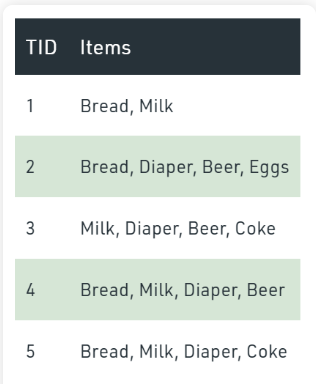

Figure 1. Illustrasi dalam *Market Basket Analysis*

Dalam contoh diatas bisa dilihat bahwa ada hubungan yang menarik yaitu [Milk, Diaper] -> [Beer]. Dapat diartikan bahwa ada kecenderungan pelanggan yang membeli susu dan popok juga akan membeli beer. Hal ini bisa menjadi panduan bagi penjaga toko untuk mengetahui kebiasaan dari pelanggan didaerahnya (Kaur & Kang, 2016).

Algoritma yang sering dipakai adalah algoritma Apriori, kemudian algoritma yang lainnya adalah Equivalence Class Transformation (ECLAT) dan FP-Growth. 
1. Algoritma Apriori <br>
Algortima Apriori merupakan salah satu algoritma Association Rule Mining yang sering dipakai. Algoritma apriori ini berdasarkan penggalian (*mining*) Boolean association rules. Kemudian setelah setiap set dari item-set yang sering muncul sudah dihasilkan, maka seluruh database akan dilakukan *scanning* dan akan memberikan *decision support* (Xie, 2021).
2. Algoritma Equivalence Class Transformation (ECLAT) <br>
Untuk mengidentifikasi set-items yang sering muncul di dataset, algoritma ECLAT akan menggunakan prinsip pencarian *depth-first* (Widyan & Rozi, 2021). ECLAT menggunakan dataset yang vertikal dan untuk melakukan pencarian item dalam database menggunakan pendekatan *bottom-up*. Pendekatan *bottom-up* ini sangat kompleks, karena angka iterasi yang besar akan menyita banyak waktu untuk menemukan dan memproses item yang sering muncul (Bansal, 2015).
3. FP-Growth <br>
FP-Growth ini melakukan kompresi pada database sehingga menghasilkan item-set yang sering muncul dan membagi database yang sudah dikompres ini menjadi suatu set dari *conditional* database, yang menghubungkan kepada set yang sering muncul dan mengaplikasikan data mining dalam setiap database (Kaur A & Jagdev G, 2017).

## Implementasi <br>
Berdasarkan beberapa studi dan penelitian yang telah dilakukan oleh para peneliti, rata-rata perbandingan algoritma association rule mining menghasilkan kesimpulan bahwa algoritma aprior memiliki akurasi yang bagus dibandingkan dengan algoritma yang lain (Fauzy et al., 2015; Mazid et al., 2009; Nengsih, 2019; Rerung, 2018). Jadi untuk pengimplementasian menggunakan python ini, saya akan menggunakan algoritma Apriori.

Import Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install apyori
from apyori import apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Step ini kita bisa melihat overview data dari dataset. dikarenakan data ini tidak memiliki header, jadi otomatis transaksi pertamanya akan menjadi header

In [22]:
url = "https://raw.githubusercontent.com/michellechandraa/tugas/main/store_data.csv"
df = pd.read_csv(url)
df.head(5)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Untuk mengatasi hal ini, maka kita dapat menggunakan header=None pada fungsi pd.read_csv()

In [23]:
df = pd.read_csv(url, header=None)
df.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Preparation

library Apriori mengharuskan dataset kita menjadi bentuk *list of list*. Dimana seluruh dataset ialah list besar dan setiap transaksi merupakan list-list kecil didalam list besar

In [24]:
records = []
for i in range(0, 7501):
    records.append([str(df.values[i,j]) for j in range(0, 20)])

Applying Appriori

min supports = 0.0045 --> dari (7(hari)x5(item muncul perhari))/7500(data) <br>
min confidence = 20% atau 0.2 <br>
min lift = 3 <br>
min length = 2 --> setidaknya ada 2 produk dalam rules <br>

In [25]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

total dari rules menggunakan algoritma Apriori

In [31]:
print(len(association_results))

48


mari kita coba lihat hasil dari rule pertama

Kemudian kita akan mencoba membacanya. dapat dilihat bahwa light cream dan chicken pada umumnya dibeli bersamaan. Ini berarti dapat menggambarkan bahwa light cream menjadi resep yang umum saat orang memasak ayam. <br>
Support valuenya = 0.0045 <br>
Confidence levelnya = 0.2905 atau 29.05%, menunjukan bahwa dari semua transaksi yang mengandung light cream, 29.05% nya juga mengandung chicken. <br>
Lift levelnya = 4.84, menunjukan bahwa chicken, 4.84 kali akan dibeli oleh orang yang membeli light cream

In [30]:
#rules pertama
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


Kemudian, kita akan menampilkan semua hasil rules dari algoritma Apriori

In [27]:
for item in association_rules:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: pasta -> escalope
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: tomato sauce -> ground beef
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: olive oil -> whole wheat pasta
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: chicken -> light cream
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: chocolate -> frozen vegetables
Support: 0.005332622317024397
Con

(Malik U, 2022)

# Referensi

Kaur A, & Jagdev G. (2017). Analyzing Working of FP-Growth Algorithm for Frequent Pattern Mining. International Journal of Research Studies in Computer Science and Engineering, 4(4). https://doi.org/10.20431/2349-4859.0404003 <br>
Bansal, U. (2015). Advanced eclat algorithm for frequent itemsets generation “Identify the Weakest Link: An International e-STC on recent attacking and defensive strategies” View project. In Article in International Journal of Applied Engineering Research. http://www.ripublication.com <br>
Czibula, G., Mihai, A., & Crivei, L. M. (2019). S PRAR: A novel relational association rule mining classification model applied for academic performance prediction. Procedia Computer Science, 159, 20–29. https://doi.org/10.1016/j.procs.2019.09.156 <br>
Dridi, S. (2021). UNSUPERVISED LEARNING-A SYSTEMATIC LITERATURE REVIEW A PREPRINT. <br>
Fauzy, M., Rahmat Saleh, K. W., & Asror, I. (2015). Penerapan Metode Association Rule Menggunakan Algoritma Apriori pada Simulasi Prediksi Hujan Wilayah Kota Bandung. <br>
Kaur, M., & Kang, S. (2016). Market Basket Analysis: Identify the Changing Trends of Market Data Using Association Rule Mining. Procedia Computer Science, 85, 78–85. https://doi.org/10.1016/j.procs.2016.05.180 <br>
Malik U. (2022). Association Rule Mining via Apriori Algorithm in Python. https://stackabuse.com/association-rule-mining-via-apriori-algorithm-in-python/ <br>
Mazid, M. M., Ali, A. B. M. S., & Tickle, K. S. (2009). A comparison between rule based and association rule mining algorithms. NSS 2009 - Network and System Security, 452–455. https://doi.org/10.1109/NSS.2009.81 <br>
Nengsih, W. (2019). ANALISA AKURASI PERMODELAN SUPERVISED DAN UNSUPERVISED LEARNING MENGGUNAKAN DATA MINING. <br>
Rerung, R. R. (2018). Penerapan Data Mining dengan Memanfaatkan Metode Association Rule untuk Promosi Produk. Jurnal Teknologi Rekayasa, 3(1), 89. https://doi.org/10.31544/jtera.v3.i1.2018.89-98 <br>
Shaukat Dar, K., Shaukat, K., Zaheer, S., & Nawaz, I. (2017). Association Rule Mining: An Application Perspective Machine Learning and Cyber Security View project Machine Learning and Data Mining View project Association Rule Mining: An Application Perspective. International Journal of Computer Science and Innovation, 2015(1), 29–38. https://www.researchgate.net/publication/284721728 <br>
Solanki, S. K., & Patel, J. T. (2015). A survey on association rule mining. International Conference on Advanced Computing and Communication Technologies, ACCT, 2015-April, 212–216. https://doi.org/10.1109/ACCT.2015.69 <br>
Widyan, A., & Rozi, A. F. (2021). Analisis Rekomendasi Produk Menggunakan Algoritma ECLAT Berdasarkan Riwayat Data Penjualan PT XYZ. Jurnal Teknologi Dan Sistem Informasi Bisnis, 3(2), 395–411. https://doi.org/10.47233/jteksis.v3i2.296 <br>
Xie, H. (2021). Research and Case Analysis of Apriori Algorithm Based on Mining Frequent Item-Sets. Open Journal of Social Sciences, 09(04), 458–468. https://doi.org/10.4236/jss.2021.94034 <br>
Yuan, X. (2017). An improved Apriori algorithm for mining association rules. AIP Conference Proceedings, 1820. https://doi.org/10.1063/1.4977361 <br>


# Terimakasih